# Proceso de EDA

## Instalación de librerias


In [87]:
# %pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importación de librerías

In [89]:
import pandas as pd
import pyarrow
import gzip
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import folium
import numpy as np


## Rutas

In [90]:
path = '../path.txt'

## Funciones


In [91]:
def entero(valor:float) -> int:
    if pd.isnull(valor):
        return int(-1)
    else:
        return int(valor)

In [92]:
def entero_cero(valor:float) -> int:
    if pd.isnull(valor):
        return int(0)
    else:
        return int(valor)

In [93]:
def completar(valor:str) -> str:
    if pd.isnull(valor):
        return '-1'
    else:
        return valor

## Exploración

In [94]:
# Con esta funcion se lee cada linea que se toma como una variables con un string asignado
with open(path, 'r') as archivo:
    for linea in archivo.readlines():
        exec(linea.strip(), globals())

In [95]:
df = pd.read_csv(estaciones_ETL, encoding='utf-8')

In [96]:
df['Fuel Type Code'].unique()

array(['CNG', 'LPG', 'BD', 'E85', 'ELEC', 'LNG', 'HY'], dtype=object)

df[['ID', 'Fuel Type Code', 'Access Code', 'Geocode Status', 'Latitude', 'Longitude', 'City', 'State',
         'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Connector Types', 'EV Pricing', 'CNG Dispenser Num']]

In [97]:
df_cng = df[['ID', 'Fuel Type Code', 'Access Code', 'Geocode Status', 'Latitude', 'Longitude', 'City', 'State', 'CNG Dispenser Num']][df['Fuel Type Code'] == 'CNG']
df_lpg = df[['ID', 'Fuel Type Code', 'Access Code', 'Geocode Status', 'Latitude', 'Longitude', 'City', 'State', 'LPG Nozzle Types']][df['Fuel Type Code'] == 'LPG']
df_bd = df[['ID', 'Fuel Type Code', 'Access Code', 'Geocode Status', 'Latitude', 'Longitude', 'City', 'State']][df['Fuel Type Code'] == 'BD']
df_e85 = df[['ID', 'Fuel Type Code', 'Access Code', 'Geocode Status', 'Latitude', 'Longitude', 'City', 'State']][df['Fuel Type Code'] == 'E85']
df_elec = df[['ID', 'Fuel Type Code', 'Access Code', 'Geocode Status', 'Latitude', 'Longitude', 'City', 'State', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Connector Types', 'EV Pricing']][df['Fuel Type Code'] == 'ELEC']
df_lng = df[['ID', 'Fuel Type Code', 'Access Code', 'Geocode Status', 'Latitude', 'Longitude', 'City', 'State']][df['Fuel Type Code'] == 'LNG']
df_hy = df[['ID', 'Fuel Type Code', 'Access Code', 'Geocode Status', 'Latitude', 'Longitude', 'City', 'State']][df['Fuel Type Code'] == 'HY']


# Revisión de valores nulos, duplicados y outliers por tipo de estación de carga

# df_cng

In [98]:
df_cng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 0 to 7493
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 207 non-null    int64  
 1   Fuel Type Code     207 non-null    object 
 2   Access Code        207 non-null    object 
 3   Geocode Status     207 non-null    object 
 4   Latitude           207 non-null    float64
 5   Longitude          207 non-null    float64
 6   City               207 non-null    object 
 7   State              207 non-null    object 
 8   CNG Dispenser Num  131 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 16.2+ KB


Nulos:

In [99]:
df_cng[df_cng['CNG Dispenser Num'].isnull()]

,ID,Fuel Type Code,Access Code,Geocode Status,Latitude,Longitude,City,State,CNG Dispenser Num
14,1252,CNG,private,200-9,40.729540,-73.607500,Garden City,NY,NaN
16,12788,CNG,private,200-8,40.008558,-75.280726,Ardmore,PA,NaN
49,20908,CNG,private,200-8,40.199940,-80.003416,Finleyville,PA,NaN
50,21435,CNG,private,200-9,43.169231,-77.661407,Rochester,NY,NaN
52,23208,CNG,private,GPS,40.730667,-74.039876,Jersey City,NJ,NaN
...,...,...,...,...,...,...,...,...,...
4551,167132,CNG,private,GPS,41.077924,-75.323657,Swiftwater,PA,NaN
4595,167606,CNG,private,200-9,40.346862,-79.759130,North Huntingdon,PA,NaN
6548,187475,CNG,private,GPS,40.208116,-76.840282,New Cumberland,PA,NaN
6636,189034,CNG,private,200-9,42.866539,-78.831713,Buffalo,NY,NaN


Tenemos nulos en la disponibilidad de carga, pero los dejamos porque nos interesa la ubicación. Solo transformamos los nulos a -1.

In [100]:
df_cng['CNG Dispenser Num'] = df_cng['CNG Dispenser Num'].apply(entero)

Verificamos:

In [101]:
df_cng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 0 to 7493
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 207 non-null    int64  
 1   Fuel Type Code     207 non-null    object 
 2   Access Code        207 non-null    object 
 3   Geocode Status     207 non-null    object 
 4   Latitude           207 non-null    float64
 5   Longitude          207 non-null    float64
 6   City               207 non-null    object 
 7   State              207 non-null    object 
 8   CNG Dispenser Num  207 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 16.2+ KB


In [102]:
df_cng.sample(10)

,ID,Fuel Type Code,Access Code,Geocode Status,Latitude,Longitude,City,State,CNG Dispenser Num
892,67057,CNG,public,200-9,40.494173,-80.267199,Pittsburgh,PA,3
831,64522,CNG,public,GPS,40.724957,-76.317177,Pottsville,PA,1
883,66255,CNG,private,200-8,40.180626,-79.853100,Donora,PA,-1
1057,74881,CNG,private,200-9,40.164017,-75.144794,Horsham,PA,-1
3674,155590,CNG,public,200-9,39.224956,-74.774461,Woodbine,NJ,4
3568,154569,CNG,private,200-9,40.501136,-78.721227,Ebensburg,PA,-1
13,787,CNG,public,200-8,40.080572,-75.252389,Plymouth Meeting,PA,1
3563,154550,CNG,private,GPS,39.960839,-79.652210,Lemont Furnace,PA,-1
3525,154291,CNG,private,GPS,41.931182,-72.597616,East Windsor,CT,-1
1659,104426,CNG,private,200-8,40.852978,-79.910671,Butler,PA,-1


Duplicados:

In [103]:
df_cng.duplicated().sum()

0

Ouliers:

In [104]:
df_cng['CNG Dispenser Num'][df_cng['CNG Dispenser Num'] != -1].describe()

count    131.000000
mean       2.175573
std        3.537667
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max       40.000000
Name: CNG Dispenser Num, dtype: float64

In [105]:
q1 = df_cng['CNG Dispenser Num'][df_cng['CNG Dispenser Num'] != -1].quantile(0.25)
q3 = df_cng['CNG Dispenser Num'][df_cng['CNG Dispenser Num'] != -1].quantile(0.75)
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr
outliers = df_cng[['ID', 'CNG Dispenser Num']][df_cng['CNG Dispenser Num'] > limite_superior]
print(f'Límite superior: {limite_superior}\nOutliers: {outliers}')

Límite superior: 3.5
Outliers:           ID  CNG Dispenser Num
0         81                  4
130    36309                  4
469    48010                  4
480    48907                 40
673    60684                  4
793    64057                  4
911    67844                  4
2350  117871                  4
3674  155590                  4
6616  188087                 12


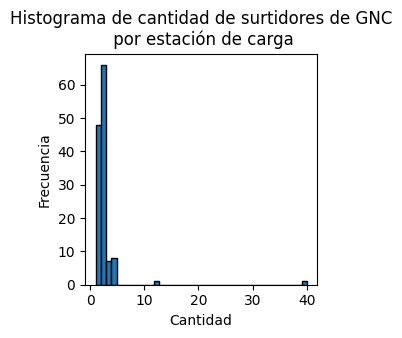

In [106]:
plt.figure(figsize=(3,3))
plt.hist(df_cng['CNG Dispenser Num'][df_cng['CNG Dispenser Num'] != -1], bins=40, edgecolor='black')
plt.title('Histograma de cantidad de surtidores de GNC\n por estación de carga')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

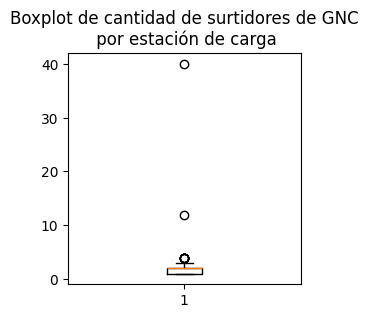

In [107]:
plt.figure(figsize=(3,3))
plt.boxplot(df_cng['CNG Dispenser Num'][df_cng['CNG Dispenser Num'] != -1])
plt.title('Boxplot de cantidad de surtidores de GNC\n por estación de carga')
plt.show()

Matemáticamente tenemos outliers, pero eso no significa que sean errores. Revisando Google Maps y otras fuentes, solo el que indica 40 es un valor erróneo. Lo reemplazamos con la mediana para fines estadísticos.

In [108]:
df_cng[df_cng['CNG Dispenser Num'] == 40]

,ID,Fuel Type Code,Access Code,Geocode Status,Latitude,Longitude,City,State,CNG Dispenser Num
480,48907,CNG,private,200-9,43.182614,-78.984194,Lewiston,NY,40


In [109]:
df_cng.loc[4867, 'CNG Dispenser Num'] = int(df_cng['CNG Dispenser Num'][df_cng['CNG Dispenser Num'] != -1].median())

In [110]:
df_cng.loc[4867, 'CNG Dispenser Num']

2.0

In [111]:
df_cng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 0 to 4867
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 207 non-null    float64
 1   Fuel Type Code     207 non-null    object 
 2   Access Code        207 non-null    object 
 3   Geocode Status     207 non-null    object 
 4   Latitude           207 non-null    float64
 5   Longitude          207 non-null    float64
 6   City               207 non-null    object 
 7   State              207 non-null    object 
 8   CNG Dispenser Num  208 non-null    float64
dtypes: float64(4), object(5)
memory usage: 24.4+ KB


In [112]:
df_cng.to_csv(cng_EDA, encoding='utf-8')

# df_lpg

In [113]:
df_lpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 17 to 8617
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                96 non-null     int64  
 1   Fuel Type Code    96 non-null     object 
 2   Access Code       96 non-null     object 
 3   Geocode Status    96 non-null     object 
 4   Latitude          96 non-null     float64
 5   Longitude         96 non-null     float64
 6   City              96 non-null     object 
 7   State             96 non-null     object 
 8   LPG Nozzle Types  96 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 7.5+ KB


Nulos: no se observan.

Duplicados:

In [114]:
df_lpg.duplicated().sum()

0

Outliers: los únicos datos numéricos son latitud y longitud, que se trataron previamente.

In [115]:
df_lpg.to_csv(lpg_EDA, encoding='utf-8')

# df_bd

In [116]:
df_bd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 56 to 8054
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              36 non-null     int64  
 1   Fuel Type Code  36 non-null     object 
 2   Access Code     36 non-null     object 
 3   Geocode Status  36 non-null     object 
 4   Latitude        36 non-null     float64
 5   Longitude       36 non-null     float64
 6   City            36 non-null     object 
 7   State           36 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.5+ KB


Nulos: no se observan.

Duplicados:

In [117]:
df_bd.duplicated().sum()

0

Outliers: los únicos datos numéricos son latitud y longitud, que se trataron previamente.

In [118]:
df_bd.to_csv(bd_EDA, encoding='utf-8')

# df_e85

In [119]:
df_e85.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 58 to 8877
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              275 non-null    int64  
 1   Fuel Type Code  275 non-null    object 
 2   Access Code     275 non-null    object 
 3   Geocode Status  275 non-null    object 
 4   Latitude        275 non-null    float64
 5   Longitude       275 non-null    float64
 6   City            275 non-null    object 
 7   State           275 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 19.3+ KB


Nulos: no se observan.

Duplicados:

In [120]:
df_e85.duplicated().sum()

0

Outliers: los únicos datos numéricos son latitud y longitud, que se trataron previamente.

In [121]:
df_e85.to_csv(e85_EDA, encoding='utf-8')

# df_lng

In [122]:
df_lng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 202 to 1090
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              5 non-null      int64  
 1   Fuel Type Code  5 non-null      object 
 2   Access Code     5 non-null      object 
 3   Geocode Status  5 non-null      object 
 4   Latitude        5 non-null      float64
 5   Longitude       5 non-null      float64
 6   City            5 non-null      object 
 7   State           5 non-null      object 
dtypes: float64(2), int64(1), object(5)
memory usage: 360.0+ bytes


Nulos: no se observan.

Duplicados:

In [123]:
df_lng.duplicated().sum()

0

Outliers: los únicos datos numéricos son latitud y longitud, que se trataron previamente.

In [124]:
df_lng.to_csv(lng_EDA, encoding='utf-8')

# df_hy

In [125]:
df_hy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 721 to 1468
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              5 non-null      int64  
 1   Fuel Type Code  5 non-null      object 
 2   Access Code     5 non-null      object 
 3   Geocode Status  5 non-null      object 
 4   Latitude        5 non-null      float64
 5   Longitude       5 non-null      float64
 6   City            5 non-null      object 
 7   State           5 non-null      object 
dtypes: float64(2), int64(1), object(5)
memory usage: 360.0+ bytes


Nulos: no se observan.

Duplicados:

In [126]:
df_hy.duplicated().sum()

0

Outliers: los únicos datos numéricos son latitud y longitud, que se trataron previamente.

In [127]:
df_hy.to_csv(hy_EDA, encoding='utf-8')

# df_elec

In [128]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8852 entries, 68 to 9475
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8852 non-null   int64  
 1   Fuel Type Code      8852 non-null   object 
 2   Access Code         8852 non-null   object 
 3   Geocode Status      8852 non-null   object 
 4   Latitude            8852 non-null   float64
 5   Longitude           8852 non-null   float64
 6   City                8852 non-null   object 
 7   State               8852 non-null   object 
 8   EV Level1 EVSE Num  34 non-null     float64
 9   EV Level2 EVSE Num  8194 non-null   float64
 10  EV DC Fast Count    799 non-null    float64
 11  EV Connector Types  8850 non-null   object 
 12  EV Pricing          2282 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 968.2+ KB


Nulos:

In [129]:
df_elec['EV Level1 EVSE Num'].unique()

array([nan,  1.,  2., 20.,  3.,  6.,  4., 11.])

Esta columna indica la cantidad de cargadores nivel 1 disponibles en cada estación de carga. Vamos a reemplazar los NaN por 0 y pasar todo a entero. Lo mismo vamos a hacer para los de nivel 2, ya que la especificación implica que hay de un tipo o de otro.

In [130]:
df_elec['EV Level1 EVSE Num'] = df_elec['EV Level1 EVSE Num'].apply(entero_cero)
df_elec['EV Level2 EVSE Num'] = df_elec['EV Level2 EVSE Num'].apply(entero_cero)

In [131]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8852 entries, 68 to 9475
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8852 non-null   int64  
 1   Fuel Type Code      8852 non-null   object 
 2   Access Code         8852 non-null   object 
 3   Geocode Status      8852 non-null   object 
 4   Latitude            8852 non-null   float64
 5   Longitude           8852 non-null   float64
 6   City                8852 non-null   object 
 7   State               8852 non-null   object 
 8   EV Level1 EVSE Num  8852 non-null   int64  
 9   EV Level2 EVSE Num  8852 non-null   int64  
 10  EV DC Fast Count    799 non-null    float64
 11  EV Connector Types  8850 non-null   object 
 12  EV Pricing          2282 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 968.2+ KB


In [132]:
df_elec['EV DC Fast Count'].unique()

array([nan,  1.,  2.,  8., 10., 14., 16.,  4.,  6., 12., 20., 18.,  3.,
       25.,  9.,  7.])

Esta columna indica la cantidad de cargadores de cagra rápida disponibles en cada estación. Los datos que no tenemos los vamos a reemplazar por -1 y pasar los resultados a int.

In [133]:
df_elec['EV DC Fast Count'] = df_elec['EV DC Fast Count'].apply(entero)

Verificamos:

In [134]:
df_elec.sample(20)

,ID,Fuel Type Code,Access Code,Geocode Status,Latitude,Longitude,City,State,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Connector Types,EV Pricing
8392,207581,ELEC,public,GPS,40.444286,-79.940944,Pittsburgh,PA,0,1,-1,J1772,NaN
6060,182242,ELEC,public,GPS,42.423225,-71.067548,Malden,MA,0,2,-1,J1772,NaN
8432,207889,ELEC,public,GPS,40.772912,-73.992589,New York,NY,0,2,-1,J1772,NaN
8628,213839,ELEC,public,GPS,41.155498,-73.774256,Chappaqua,NY,0,2,-1,J1772,NaN
4127,162317,ELEC,public,GPS,42.205127,-74.212669,Hunter,NY,0,2,-1,J1772,NaN
5456,175064,ELEC,public,GPS,40.039122,-76.140294,Bird in Hand,PA,0,2,-1,J1772,NaN
8500,212115,ELEC,public,GPS,40.454427,-79.944441,Pittsburgh,PA,0,2,-1,J1772,NaN
3614,155029,ELEC,public,GPS,42.815708,-73.923732,Schenectady,NY,0,2,-1,J1772,$0.18 per hour
3536,154366,ELEC,public,GPS,41.837635,-71.117590,Dighton,MA,0,2,-1,J1772,NaN
4457,166326,ELEC,private,200-9,40.777924,-73.957245,Manhattan,NY,0,4,-1,J1772,NaN


In [135]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8852 entries, 68 to 9475
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8852 non-null   int64  
 1   Fuel Type Code      8852 non-null   object 
 2   Access Code         8852 non-null   object 
 3   Geocode Status      8852 non-null   object 
 4   Latitude            8852 non-null   float64
 5   Longitude           8852 non-null   float64
 6   City                8852 non-null   object 
 7   State               8852 non-null   object 
 8   EV Level1 EVSE Num  8852 non-null   int64  
 9   EV Level2 EVSE Num  8852 non-null   int64  
 10  EV DC Fast Count    8852 non-null   int64  
 11  EV Connector Types  8850 non-null   object 
 12  EV Pricing          2282 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 968.2+ KB


In [136]:
df_elec['EV Pricing'].unique()

array(['Free', nan, '$0.13 per kWh',
       'Free chargers - garage parking rates', '$1 per hour',
       '$3 per session for ticket holders; $1 per hour parking fee',
       'Maximum payment of $15 for customers; Maximum payment of $29.95 for non-customers',
       '$1.50 per hour', '$2 per hour', 'Free; donations accepted',
       '$0.50 per hour', '$0.25 per kWh', 'Free; parking fee',
       'Free; 4 hour limit', '$2 per session',
       'L1: $0.89 per kWh; L2: $1.40 per kWh',
       '$23 early bird (before 9am), $30 after, regardless of charging time. Pay at garage office.',
       'Free; Donations encouraged', 'Variable parking fee',
       'Level 2: $0.59 per kWh', 'Level 2: $0.49 per kWh',
       'Free; pay to park',
       '$1.35 per hour for first 4 hours, $3.00 per hour thereafter',
       '$0.28 per kWh; $0.26 per minute above 60 kW and $0.13 per minute at or below 60 kW',
       '$10 per session', '$0.10 per kWh',
       '$0.18 per kWh for 20 minutes, $20 per hour after; pa

En esta columna, por el momento, solo vamos a completar con -1 los datos faltantes. La idea es procesarla más adelante y hacer la transformación con un poco más de contexto.

In [137]:
df_elec['EV Pricing'] = df_elec['EV Pricing'].apply(completar)

Verificamos:

In [138]:
df_elec['EV Pricing'].sample(20)

7876                                                   -1
8205                                                   -1
6518                                                   -1
3449                                                   -1
844                                                    -1
3701                                                   -1
557                                                  Free
1804                                                 Free
5697                                                   -1
8125                               Level 2: $0.49 per kWh
2629                                                   -1
8056                                                   -1
1607    $0.28 per kWh; $0.26 per minute above 60 kW an...
8137                                                   -1
8493                                                   -1
5481                                                   -1
6994                                                   -1
4070          

In [139]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8852 entries, 68 to 9475
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8852 non-null   int64  
 1   Fuel Type Code      8852 non-null   object 
 2   Access Code         8852 non-null   object 
 3   Geocode Status      8852 non-null   object 
 4   Latitude            8852 non-null   float64
 5   Longitude           8852 non-null   float64
 6   City                8852 non-null   object 
 7   State               8852 non-null   object 
 8   EV Level1 EVSE Num  8852 non-null   int64  
 9   EV Level2 EVSE Num  8852 non-null   int64  
 10  EV DC Fast Count    8852 non-null   int64  
 11  EV Connector Types  8850 non-null   object 
 12  EV Pricing          8852 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 968.2+ KB


Duplicados:

In [140]:
df_elec.duplicated().sum()

0

Outliers:

Vamos a analzar las columnas con valores numéricos menos la de precio, que hay que transformarla.

In [141]:
columnas_a_analizar = ['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']

In [142]:
for columna in columnas_a_analizar:
    print(f'\n\nColumna: {columna}\n{df_elec[columna][df_elec[columna] > 0].describe()}')
    # En este caso tomamos mayor a 0 porque a los NaN les asignamos -1 (porque no conocemos los valores). Como en Nivel 1 hay muy
    # pocos valores y a los faltantes se les asignó 0 (entendiendo que es el complemento de Nivel 2), no podemos tomar un promedio real.



Columna: EV Level1 EVSE Num
count    34.000000
mean      2.470588
std       3.636809
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      20.000000
Name: EV Level1 EVSE Num, dtype: float64


Columna: EV Level2 EVSE Num
count    8194.000000
mean        2.305956
std         1.768624
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max        60.000000
Name: EV Level2 EVSE Num, dtype: float64


Columna: EV DC Fast Count
count    799.000000
mean       4.123905
std        3.852339
min        1.000000
25%        1.000000
50%        2.000000
75%        8.000000
max       25.000000
Name: EV DC Fast Count, dtype: float64


In [143]:
for columna in columnas_a_analizar:
    q1 = df_elec[columna][df_elec[columna] > 0].quantile(0.25)
    q3 = df_elec[columna][df_elec[columna] > 0].quantile(0.75)
    iqr = q3 - q1
    limite_superior = q3 + 1.5 * iqr
    outliers = df_elec[['ID', columna]][df_elec[columna] > limite_superior]
    print(f'\n\nColumna: {columna}\nLímite superior: {limite_superior}\nOutliers: \n{outliers}')



Columna: EV Level1 EVSE Num
Límite superior: 3.5
Outliers: 
          ID  EV Level1 EVSE Num
466    47804                  20
3383  153028                   6
6310  184854                   4
6381  185492                  11


Columna: EV Level2 EVSE Num
Límite superior: 2.0
Outliers: 
          ID  EV Level2 EVSE Num
68     32973                   6
109    35562                   7
143    36925                   5
144    36926                   3
145    36928                   4
...      ...                 ...
9364  223304                   4
9366  223311                   6
9404  223509                  14
9409  223526                   4
9470  224261                  16

[1284 rows x 2 columns]


Columna: EV DC Fast Count
Límite superior: 18.5
Outliers: 
          ID  EV DC Fast Count
1584  102300                20
1591  102330                20
3062  149365                20
7294  194700                25


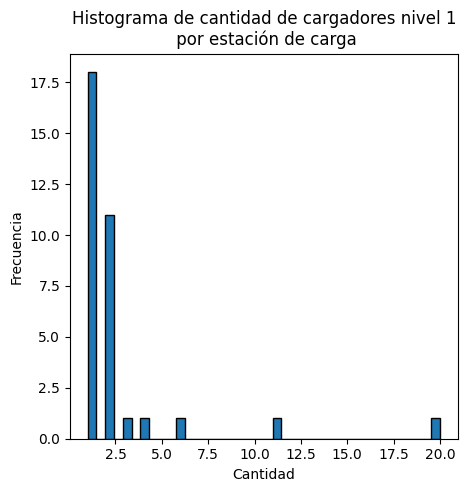

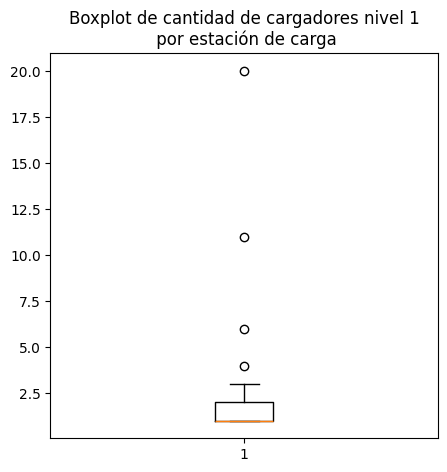

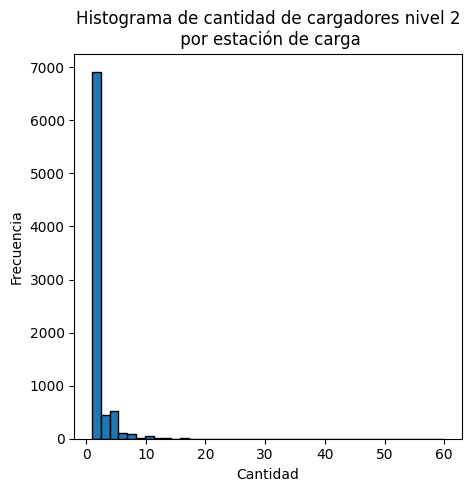

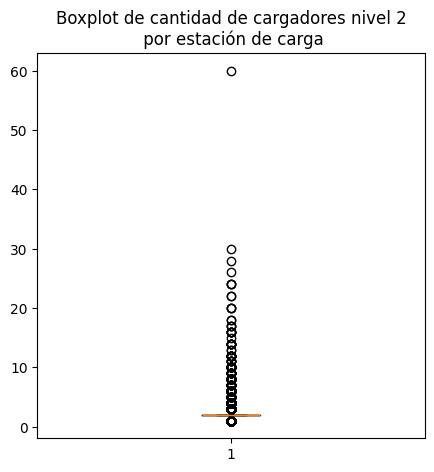

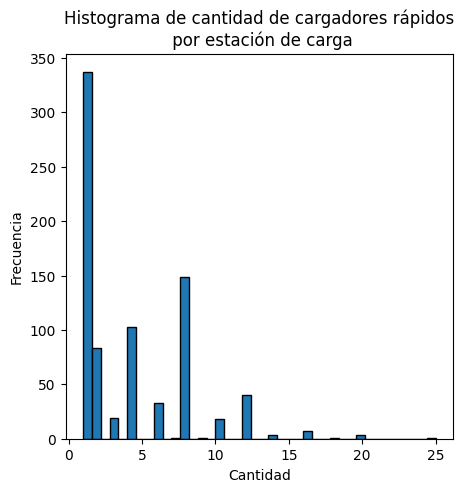

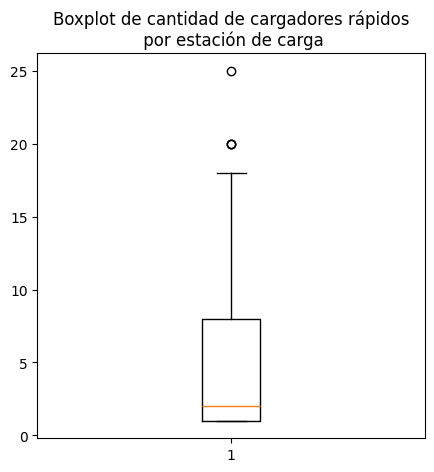

In [144]:
for columna in columnas_a_analizar:
    columnas_español = {'EV Level1 EVSE Num':'cantidad de cargadores nivel 1',
                        'EV Level2 EVSE Num':'cantidad de cargadores nivel 2',
                        'EV DC Fast Count':'cantidad de cargadores rápidos'}
    print()
    print()
    plt.figure(figsize=(5,5))
    plt.hist(df_elec[columna][df_elec[columna] > 0], bins=40, edgecolor='black')
    plt.title(f'Histograma de {columnas_español[columna]}\n por estación de carga')
    plt.xlabel('Cantidad')
    plt.ylabel('Frecuencia')
    plt.show()
    print()
    print()
    plt.figure(figsize=(5,5))
    plt.boxplot(df_elec[columna][df_elec[columna] > 0])
    plt.title(f'Boxplot de {columnas_español[columna]}\n por estación de carga')
    plt.show()
    print()
    print()

Vemos que, matemáticamente, tenemos muchos valores atípicos (outliers), pero no se van a modificar porque no parecen ser errores. Analizando el contexto, verificamos que existen estacionamientos y centros de carga con esas cantidades de cargadores.

In [145]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8852 entries, 68 to 9475
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8852 non-null   int64  
 1   Fuel Type Code      8852 non-null   object 
 2   Access Code         8852 non-null   object 
 3   Geocode Status      8852 non-null   object 
 4   Latitude            8852 non-null   float64
 5   Longitude           8852 non-null   float64
 6   City                8852 non-null   object 
 7   State               8852 non-null   object 
 8   EV Level1 EVSE Num  8852 non-null   int64  
 9   EV Level2 EVSE Num  8852 non-null   int64  
 10  EV DC Fast Count    8852 non-null   int64  
 11  EV Connector Types  8850 non-null   object 
 12  EV Pricing          8852 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 968.2+ KB


In [146]:
nombres_normalizados = {'ID':'station_id', 'Access Code':'acces_code', 'Latitude':'latitude', 'Longitude': 'longitude', 'City':'city', 'State':'state',
                        'EV Level1 EVSE Num':'ev_level1_evse_num', 'EV Level2 EVSE Num':'ev_level2_evse_num', 'EV DC Fast Count':'ev_dc_fast_count',
                        'EV Connector Types':'ev_connector_types', 'EV Pricing':'ev_pricing'}

In [147]:
df_elec.rename(columns=nombres_normalizados, inplace=True)

In [148]:
df_elec = df_elec.drop(['Fuel Type Code', 'Geocode Status'],axis=1)

In [149]:
df_elec.to_csv(elec_EDA, encoding='utf-8')

# Gráficos

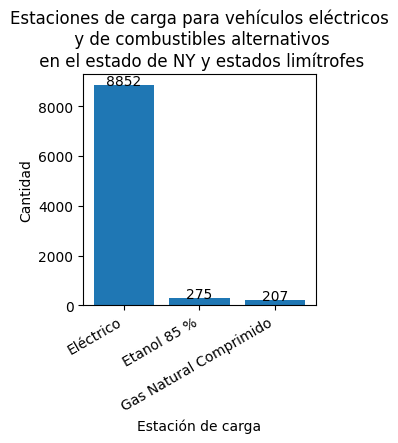

In [150]:
plt.figure(figsize=(3,3))
df_tipo_combustible = df.groupby('Fuel Type Code').size().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False).head(3)
df_tipo_combustible['Fuel Type Code'] = df_tipo_combustible['Fuel Type Code'].replace('ELEC', 'Eléctrico').replace('E85', 'Etanol 85 %').replace('CNG', 'Gas Natural Comprimido')
plt.bar(df_tipo_combustible['Fuel Type Code'], df_tipo_combustible['Cantidad'])
plt.xlabel('Estación de carga')
plt.ylabel('Cantidad')
plt.xticks(rotation=30, ha='right')
plt.title('Estaciones de carga para vehículos eléctricos\n y de combustibles alternativos\n en el estado de NY y estados limítrofes')
for i, cantidad in enumerate(df_tipo_combustible['Cantidad']):
    plt.text(df_tipo_combustible['Fuel Type Code'].iloc[i], cantidad + 0.1, str(cantidad), ha='center')
plt.show()

KeyError: 'City'

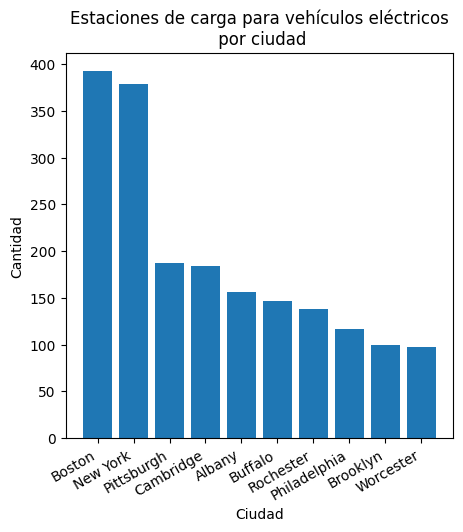

In [154]:
plt.figure(figsize=(5,5))
df_ciudades = df_elec.groupby('city')['station_id'].count().reset_index(name='Cantidad').sort_values(by='Cantidad', ascending=False).head(10)
plt.bar(df_ciudades['city'], df_ciudades['Cantidad'])
plt.xlabel('Ciudad')
plt.ylabel('Cantidad')
plt.xticks(rotation=30, ha='right')
plt.title('Estaciones de carga para vehículos eléctricos\n por ciudad')
for i, cantidad in enumerate(df_ciudades['Cantidad']):
    plt.text(df_ciudades['City'].iloc[i], cantidad + 0.1, str(cantidad), ha='center')
plt.show()